### Practice Animation

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation

<IPython.core.display.Javascript object>


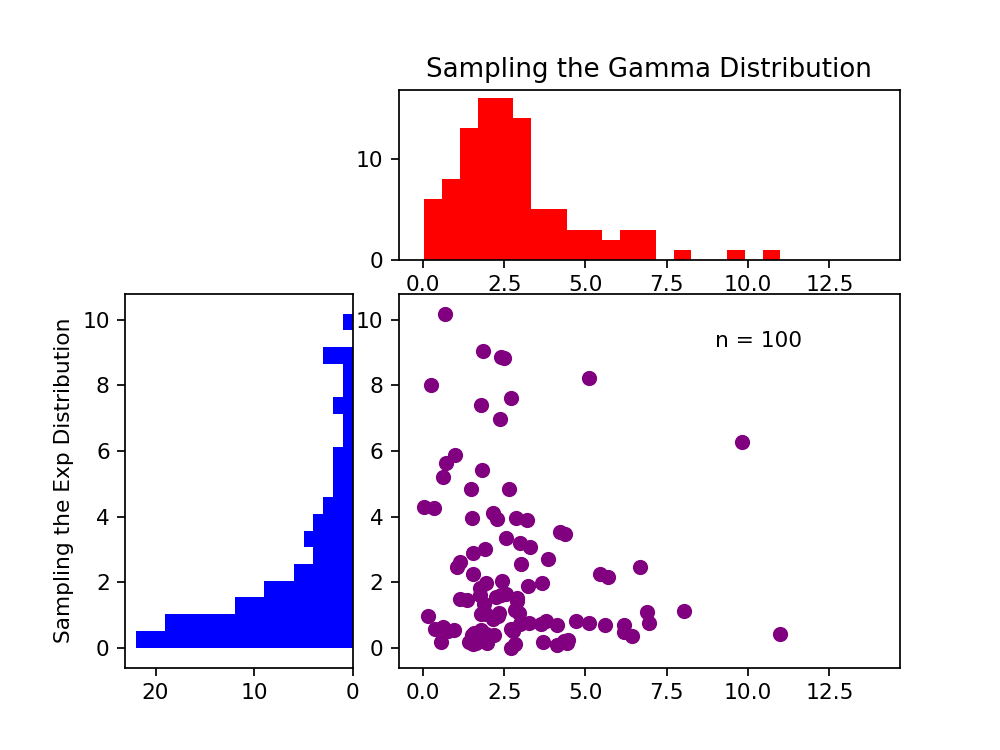

In [11]:
fig = plt.figure()

# use gridspec to partition the figure into subplots
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])#, autoscalex_on=False)
#top_histogram.axis(xaxis=[0,12])
side_histogram = plt.subplot(gspec[1:, 0])#, autoscaley_on=False)
#side_histogram.axis(yaxis=[0,12])
side_histogram.invert_xaxis()
lower_right = plt.subplot(gspec[1:, 1:], sharex=top_histogram, sharey=side_histogram)
#lower_right.axis([0,12,0,12])                    

In [14]:
n = 100
# generate 4 random variables 

x2 = np.random.gamma(2, 1.5, n)
x3 = np.random.exponential(2, n)

# create the function that will do the plotting, where curr is the current frame
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n: 
        a.event_source.stop()
    
    plt.gca().cla()    
    lower_right.scatter(x2[:curr], x3[:curr], color='purple') 
    top_histogram.hist(x2[:curr], bins=20, range=(x2.min(),x2.max()), color='red')
    side_histogram.hist(x3[:curr],bins=20, range=(x3.min(),x3.max()), color='blue', orientation='horizontal')                      

    top_histogram.set_title('Sampling the Gamma Distribution')
    side_histogram.set_ylabel('Sampling the Exp Distribution')

    plt.annotate('n = {}'.format(curr), [x2.max()-2,x3.max()-1])
                           

In [15]:

a = animation.FuncAnimation(fig, update, interval = 100)